## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [7]:
df = pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [8]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    505
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2477  2023-06-01 00:00:00     php   2399
2478  2023-06-01 00:00:00  python  12919
2479  2023-06-01 00:00:00       r   2821
2480  2023-06-01 00:00:00    ruby    254
2481  2023-06-01 00:00:00   swift   1280


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
print(df.shape)

(2482, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482 entries, 0 to 2481
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2482 non-null   object
 1   TAG     2482 non-null   object
 2   POSTS   2482 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 58.3+ KB
None


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [14]:
df.groupby('TAG')['POSTS'].sum().sort_values(ascending=False)

TAG
javascript    2500729
python        2145468
java          1900407
c#            1595224
php           1459606
c++            795693
r              492637
c              397344
swift          328246
ruby           228103
go              69718
perl            67704
delphi          51034
assembly        42933
Name: POSTS, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [17]:
df.groupby('TAG')['DATE'].count().sort_values(ascending=False)

TAG
c#            180
assembly      179
c             179
c++           179
delphi        179
java          179
javascript    179
perl          179
php           179
python        179
ruby          179
r             177
swift         171
go            164
Name: DATE, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [20]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y-%m-%d %H:%M:%S")

In [21]:
df.dtypes

DATE     datetime64[ns]
TAG              object
POSTS             int64
dtype: object

## Data Manipulation



In [24]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [25]:
reshaped_df.shape

(180, 14)

In [26]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


In [27]:
reshaped_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2008-07-01 to 2023-06-01
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   assembly    179 non-null    float64
 1   c           179 non-null    float64
 2   c#          180 non-null    float64
 3   c++         179 non-null    float64
 4   delphi      179 non-null    float64
 5   go          164 non-null    float64
 6   java        179 non-null    float64
 7   javascript  179 non-null    float64
 8   perl        179 non-null    float64
 9   php         179 non-null    float64
 10  python      179 non-null    float64
 11  r           177 non-null    float64
 12  ruby        179 non-null    float64
 13  swift       171 non-null    float64
dtypes: float64(14)
memory usage: 21.1 KB


In [28]:
reshaped_df.fillna(0, inplace=True)

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

<AxesSubplot: xlabel='DATE'>

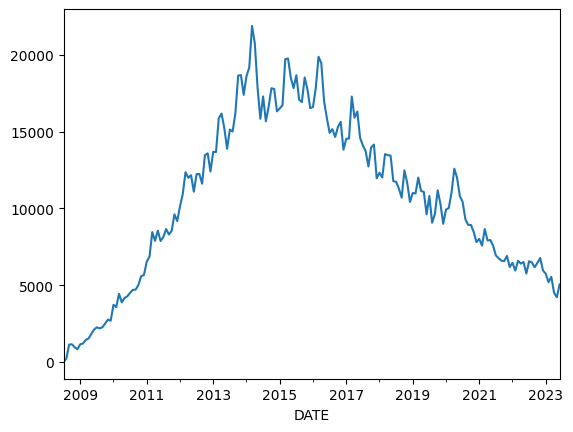

In [30]:
reshaped_df['java'].plot()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

<AxesSubplot: xlabel='DATE'>

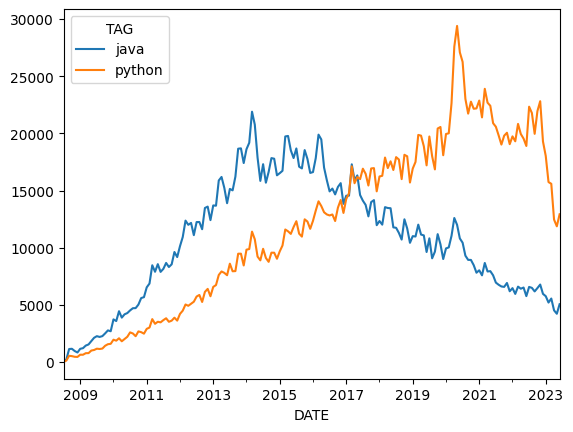

In [33]:
reshaped_df[['java', 'python']].plot()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

<AxesSubplot: xlabel='DATE'>

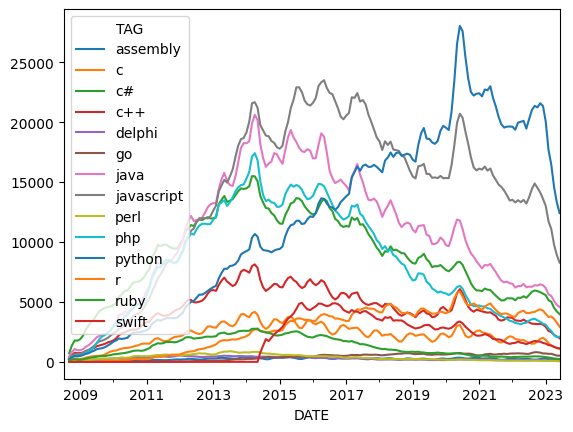

In [39]:
reshaped_df.rolling(window=3).mean().plot()

<AxesSubplot: xlabel='DATE'>

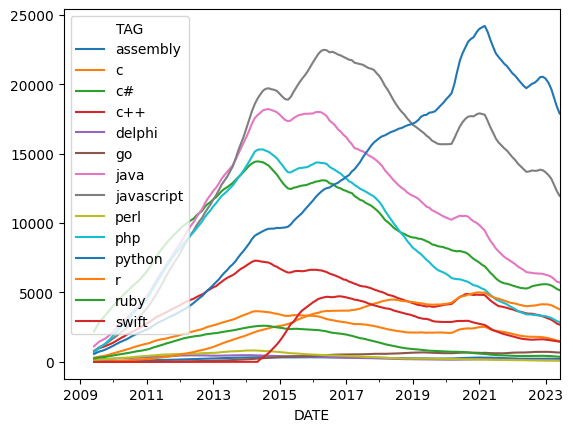

In [40]:
reshaped_df.rolling(window=12).mean().plot()